<a href="https://colab.research.google.com/github/yustiks/statistics_in_python/blob/master/dz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

<pre>
ФИО: Никифоров Владимир
</pre>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).

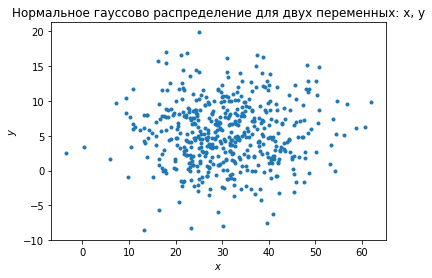

In [2]:
norm_x = sts.norm(loc=30, scale=10)
norm_y = sts.norm(loc=5, scale=5)

x = norm_x.rvs(size=500)
y = norm_y.rvs(size=500)
plt.scatter(x, y, marker='.')
plt.title('Нормальное гауссово распределение для двух переменных: x, y')
plt.ylabel('$y$')
plt.xlabel('$x$');

Нарисовать плотность распределения полученной выборки x.

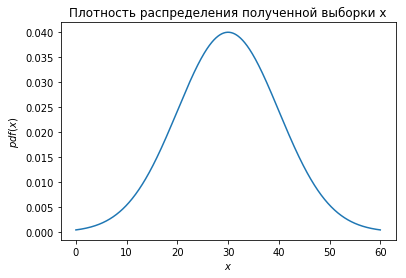

In [3]:
axis_x = np.linspace(0,60,1000)
pdf = norm_x.pdf(axis_x)
plt.plot(axis_x, pdf)
plt.title('Плотность распределения полученной выборки x')
plt.ylabel('$pdf(x)$')
plt.xlabel('$x$');

Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки. Построить график зависимости (корелляции) x от y.

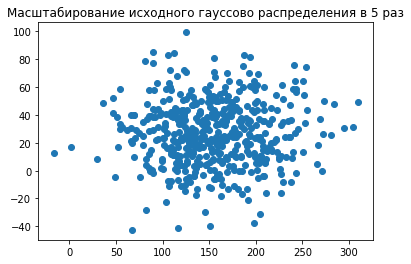

In [4]:
n = 5
Scale = np.array([[n, 0], [0, n]])

# проводим масштабирование
Y = np.vstack((x, y)).T.dot(Scale)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title(f'Масштабирование исходного гауссово распределения в {n} раз');

Нарисовать плотность распределения полученной выборки x. Сравнить с предыдущим графиком x. 

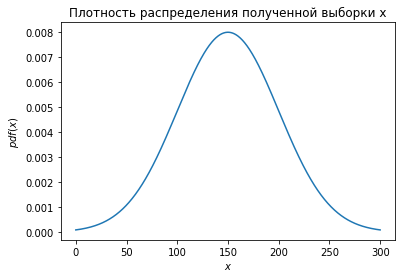

In [5]:
norm_x_scaled = sts.norm(loc=30*5, scale=10*5)
axis_x = np.linspace(0,300,1000)
pdf = norm_x_scaled.pdf(axis_x)
plt.plot(axis_x, pdf)
plt.title('Плотность распределения полученной выборки x')
plt.ylabel('$pdf(x)$')
plt.xlabel('$x$');

Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0? 

In [6]:
from scipy.stats import pearsonr
x = Y[:, 0]
y = Y[:, 1]
corr, p_value = pearsonr(x, y)
print(f'Коэффициент Пирсона для переменных x, y равен {corr}')

Коэффициент Пирсона для переменных x, y равен 0.028484104845267474


* Положительное значение коэффициента Пирсона означает положительную корреляцию выбранных переменных (положительную линейную связь между двумя количественными показателями).
* Отрицательное значение коэффициента Пирсона означает отрицательную корреляцию выбранных переменных.
* Значение коэффициента Пирсона=0 означает отсутствие линейной связи выбранных переменных.

Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?

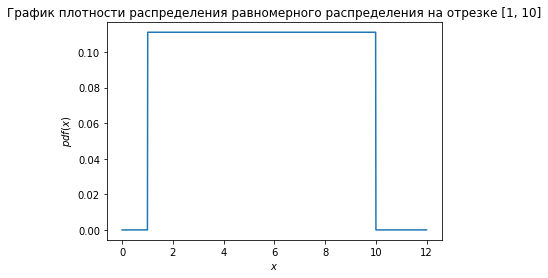

In [7]:
a = 1
b = 10

# равномерное распределение на отрезке [1, 10]
uniform_rv = sts.uniform(a, b-a)

x = np.linspace(0, 12, 1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)
plt.title('График плотности распределения равномерного распределения на отрезке [1, 10]')
plt.ylabel('$pdf(x)$')
plt.xlabel('$x$');

Плотность распределения равномерного распределение отличается от плотности распределения нормального распределения тем, что для равномерного распределения плотность распределения в любой точке существования значений равномерного распределения одинакова. Для нормального распределения плотность распределения имеет вид гауссианы/колокола с максимумом в точке мат.ожидания нормального распределения.

Найти на графике примеры выброса. Что они означают?  

* Наиболее явными выбросами на графике являются точки [0,97], [40,82], [79,0], [83,10].
* Такие выбросы означают аномальные примеры распределения/датасета, которые скорее всего являются исключениями из анализируемой статистики и являются шумом, который необходимо удалить перед анализом датасета

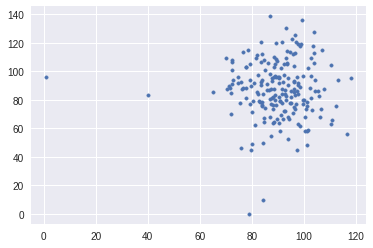

Найти корелляцию в следующих данных: 

In [8]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [9]:
#нормализуем значения
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932


Коэффициент Пирсона со значением -0.2083170484878848 говорит о слабой отрицательной корреляции.


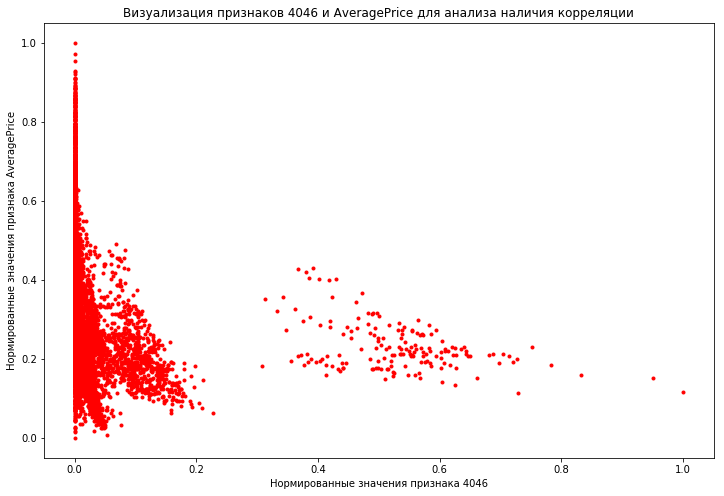

In [10]:
corr, _ = pearsonr(df_norm[0], df_norm[1])
print(f'Коэффициент Пирсона со значением {corr} говорит о слабой отрицательной корреляции.')
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(df_norm[0], df_norm[1], 'r.')
plt.title('Визуализация признаков 4046 и AveragePrice для анализа наличия корреляции')
plt.xlabel('Нормированные значения признака 4046')
plt.ylabel('Нормированные значения признака AveragePrice');

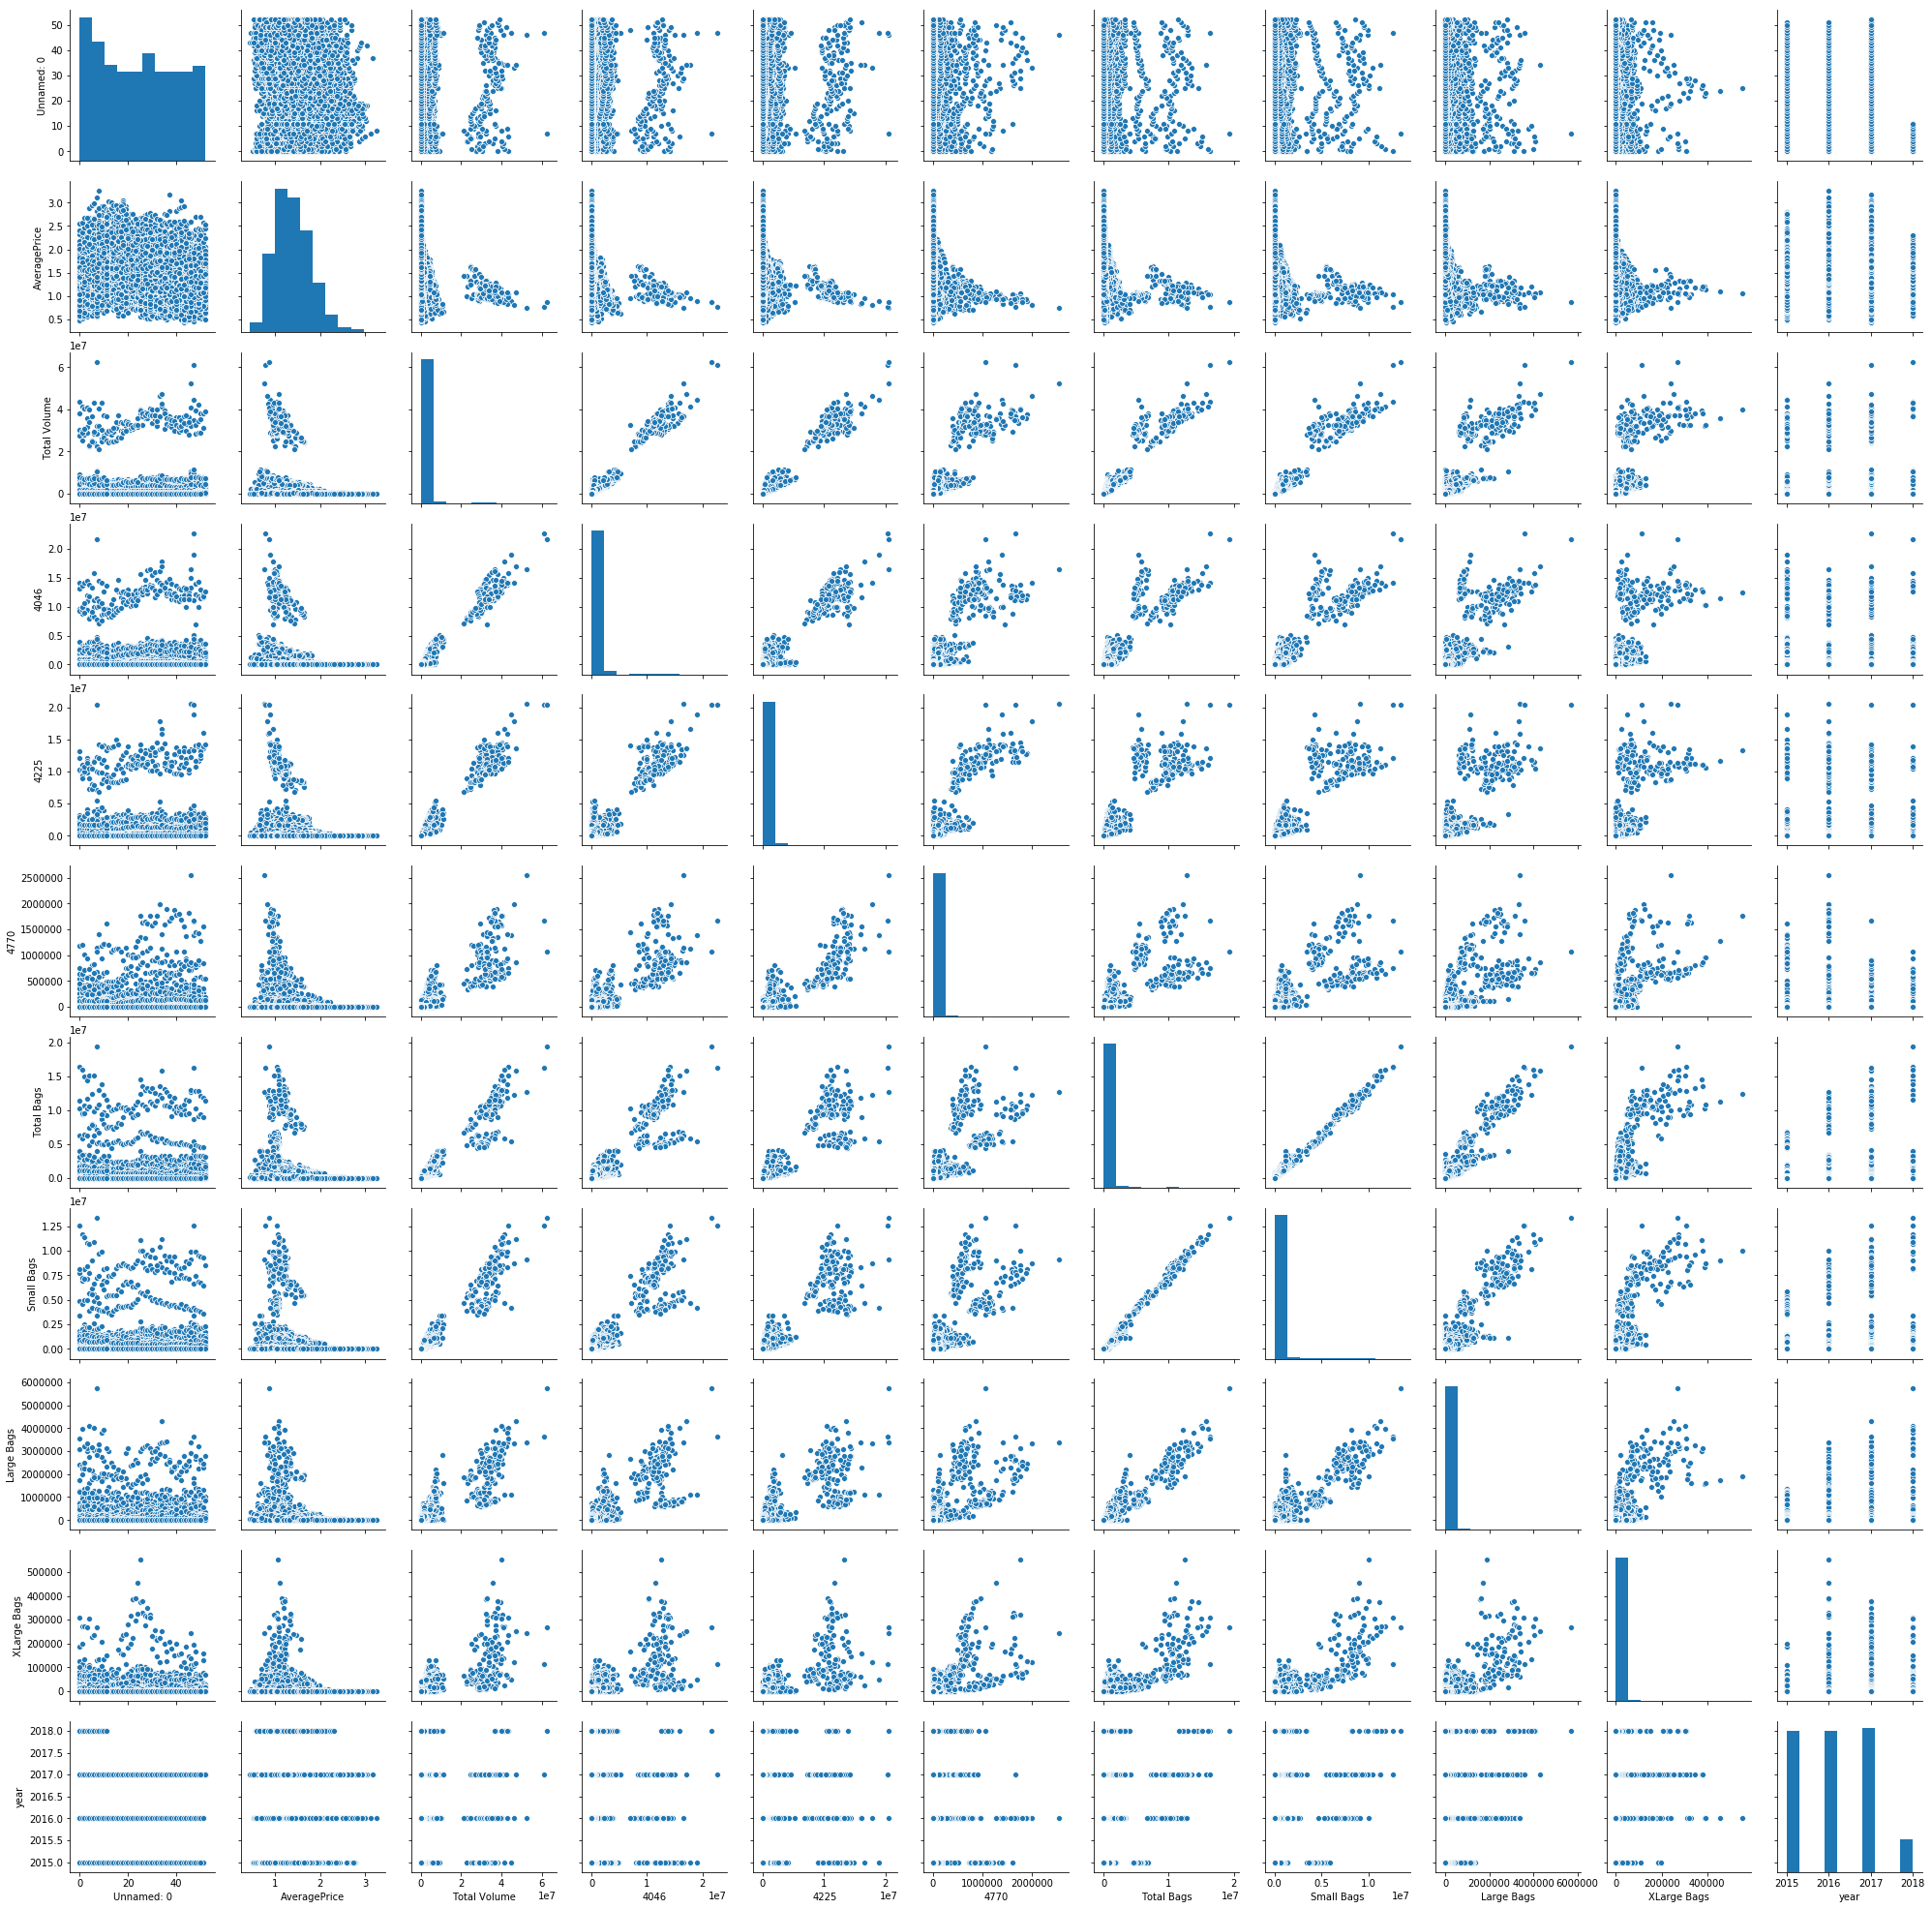

In [11]:
# для получения наиболее полной информации о взаимодействии количественных признаков (в лоб) между собой в pandas-DataFrame воспользуемся библиотекой seaborn и ее методом pairplot:
sns.pairplot(df);

In [12]:
# Между определенными признаками однозначно есть сильная линейная связь
# Проверим сами значения корреляции между числовыми признаками датасета:
df.corr(method ='pearson')

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [13]:
# слабая корреляция (как положительная, так и отрицательная) - коэффициент Пирсона по модулю < 0.3
df.corr(method ='pearson')[(abs(df.corr(method ='pearson'))<0.3)].dropna(how='all').dropna(axis=1, how='all')

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,NaN,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,NaN,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017193
4046,0.017628,-0.208317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003353
4225,0.019829,-0.172928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009559
4770,0.041752,-0.179446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.036531
Total Bags,-0.002219,-0.177088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071552
Small Bags,0.000347,-0.174730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.063915
Large Bags,-0.009196,-0.172940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.087891
XLarge Bags,-0.011546,-0.117592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081033


In [14]:
# средняя корреляция - коэффициент Пирсона по модулю между 0.3 и 0.7
df.corr(method ='pearson')[(abs(df.corr(method ='pearson'))>=0.3) & (abs(df.corr(method ='pearson'))<=0.7)].dropna(how='all').dropna(axis=1, how='all')

,4046,4225,4770,Large Bags,XLarge Bags
4046,NaN,NaN,NaN,NaN,0.699377
4225,NaN,NaN,NaN,NaN,0.688809
4770,NaN,NaN,NaN,0.698471,0.679861
Large Bags,NaN,NaN,0.698471,NaN,NaN
XLarge Bags,0.699377,0.688809,0.679861,NaN,NaN


In [15]:
# Сильная корреляция - коэффициент Пирсона по модулю больше 0,7
df.corr(method ='pearson')[(abs(df.corr(method ='pearson'))>0.7) & (abs(df.corr(method ='pearson')) < 1)].dropna(how='all').dropna(axis=1, how='all')

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
Total Volume,NaN,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157
4046,0.977863,NaN,0.926110,0.833389,0.920057,0.925280,0.838645,NaN
4225,0.974181,0.926110,NaN,0.887855,0.905787,0.916031,0.810015,NaN
4770,0.872202,0.833389,0.887855,NaN,0.792314,0.802733,NaN,NaN
Total Bags,0.963047,0.920057,0.905787,0.792314,NaN,0.994335,0.943009,0.804233
Small Bags,0.967238,0.925280,0.916031,0.802733,0.994335,NaN,0.902589,0.806845
Large Bags,0.880640,0.838645,0.810015,NaN,0.943009,0.902589,NaN,0.710858
XLarge Bags,0.747157,NaN,NaN,NaN,0.804233,0.806845,0.710858,NaN


В итоге мы видим достаточно много коррелирующихся признаков друг с другом признаков, что также можно увидеть на тепловой диаграмме:

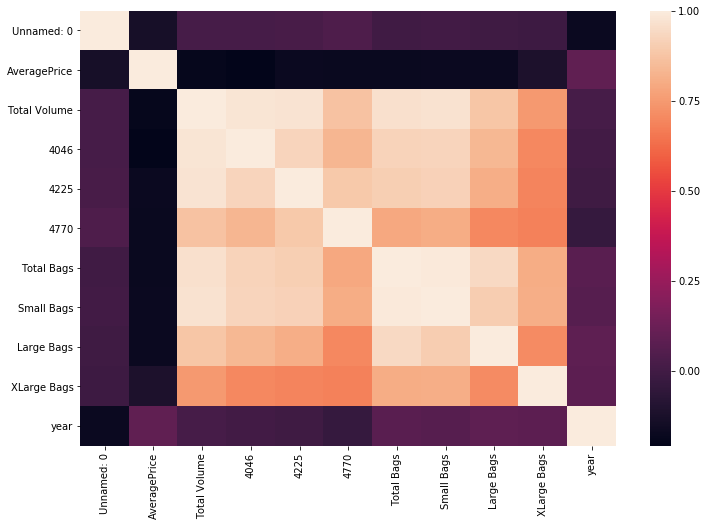

In [16]:
sns.heatmap(df.corr(method ='pearson'))

На тепловой диаграмме видно много очень светлых квадратов вне главной диагонали, что говорит о сильной корреляции между признаками.